In [2]:
# VIKAS YADAV 211166 , 16th April 2023
# importing the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [3]:
# reading the data from the csv file
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv', na_values='?')
df.head(5)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
# dropping redundant columns from the dataframe
df = df.drop(['STDs: Time since first diagnosis',
             'STDs: Time since last diagnosis'], axis=1)
df.head(5)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [5]:
# Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Display the first few rows of the training and testing DataFrames
print(train_df.head())
print(test_df.head())


     Age  Number of sexual partners  First sexual intercourse  \
28    37                        3.0                      24.0   
457   15                        3.0                      14.0   
193   26                       10.0                      16.0   
367   19                        1.0                      19.0   
467   16                       28.0                      10.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
28                  1.0     1.0        3.000000             0.040000   
457                 1.0     1.0        1.266973             0.513202   
193                 1.0     1.0        9.000000             0.513202   
367                 1.0     0.0        0.000000             0.000000   
467                 1.0     1.0        5.000000             5.000000   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
28                       0.0                              0.0  0.0  ...   
457                      N

In [6]:
# Impute all NaN values in train_df with median of that column
train_df = train_df.fillna(train_df.median())
test_df = test_df.fillna(test_df.median())


In [7]:
# Define columns to consider for outlier detection (exclude last 4 columns) in training data
cols = test_df.columns[:-4]

# Remove outliers using IQR method
Q1 = train_df[cols].quantile(0.25)
Q3 = train_df[cols].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[~((train_df[cols] < (Q1 - 1.5 * IQR))
                      | (train_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [8]:
# Define columns to consider for outlier detection (exclude last 4 columns) in testing data
cols = test_df.columns[:-4]

# Remove outliers using IQR method
q1 = test_df[cols].quantile(0.25)
q3 = test_df[cols].quantile(0.75)
iqr = q3 - q1
test_df = test_df[~((test_df[cols] < (q1 - 1.5 * iqr)) |
                    (test_df[cols] > (q3 + 1.5 * iqr))).any(axis=1)]


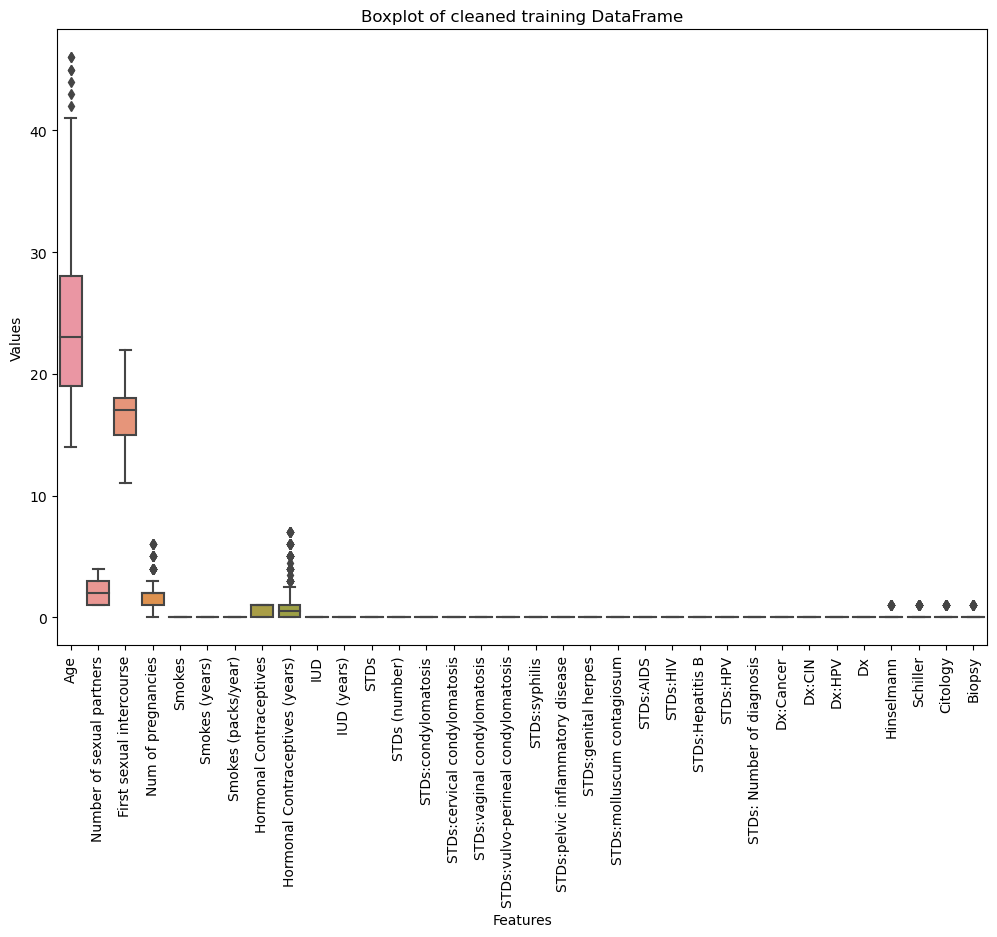

In [9]:
# Boxplot the cleaned training DataFrame
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=train_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Boxplot of cleaned training DataFrame')
plt.show()


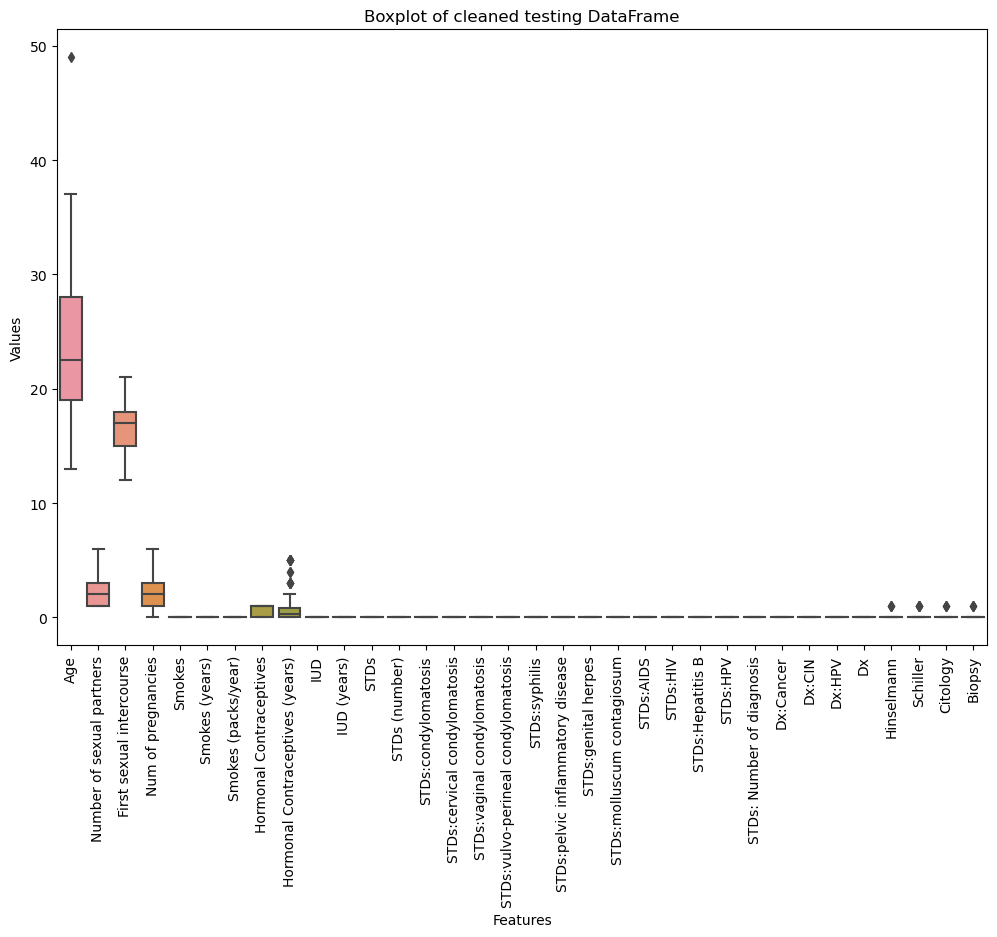

In [10]:
# Boxplot the cleaned testing DataFrame
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=test_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Boxplot of cleaned testing DataFrame')
plt.show()


In [11]:
# Normalize the cleaned training DataFrame
scaler = StandardScaler()
train_df[cols] = scaler.fit_transform(train_df[cols])
print(train_df.shape)


(351, 34)


In [12]:
# Normalize the cleaned testing DataFrame
test_df[cols] = scaler.fit_transform(test_df[cols])
print(test_df.shape)


(144, 34)


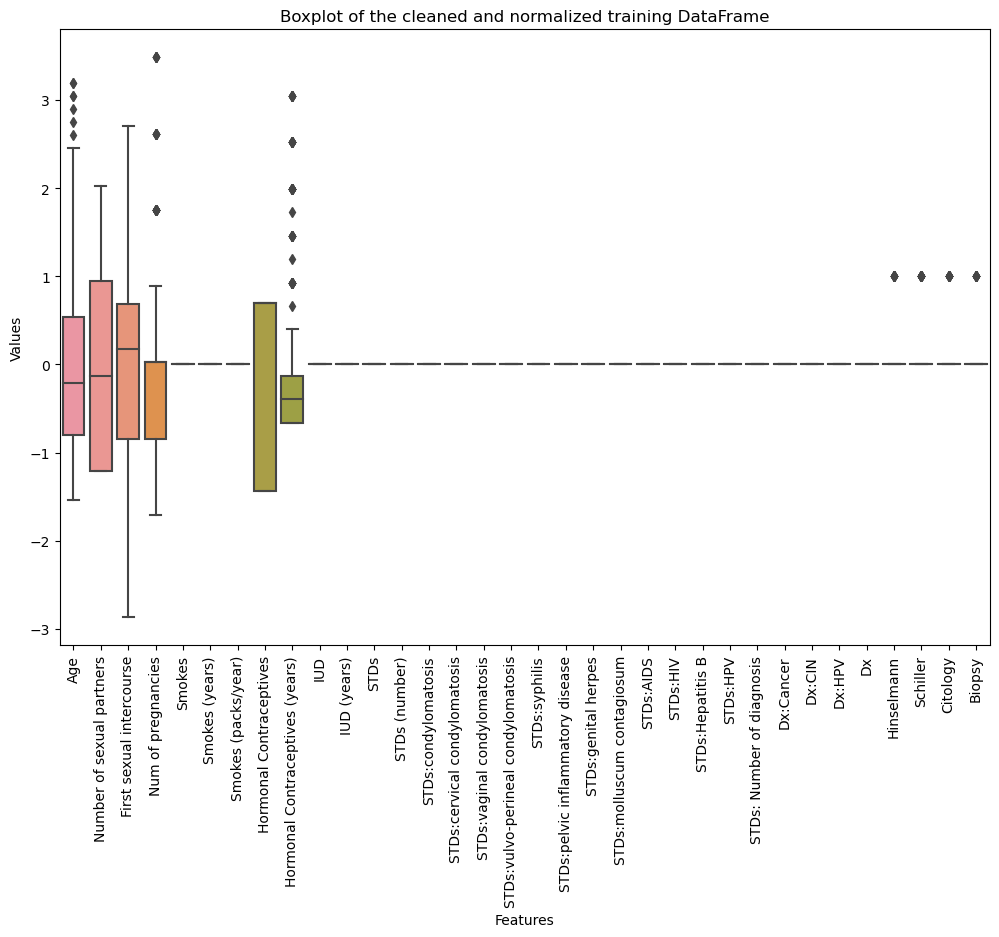

In [13]:
# Boxplot the cleaned and normalized training DataFrame
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=train_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Boxplot of the cleaned and normalized training DataFrame')
plt.show()


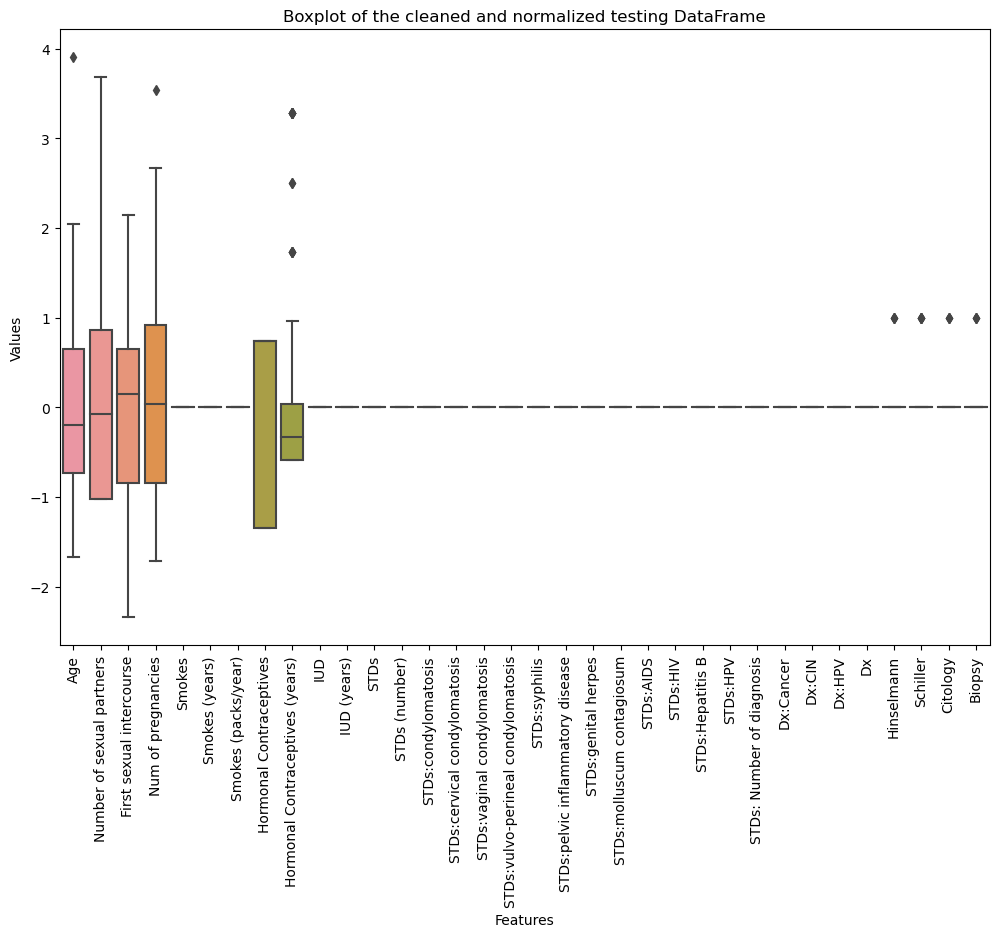

In [14]:
# Boxplot the cleaned and normalized testing DataFrame
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=test_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Boxplot of the cleaned and normalized testing DataFrame')
plt.show()


In [15]:
# Check for NaN values in train_df
if train_df.isna().sum().sum() == 0:
    print('train_df does not contain any NaN values')
else:
    print('train_df contains NaN values')


train_df does not contain any NaN values


In [16]:
# Split train_df into risk factors and target variables
risk_factors = train_df.iloc[:, :-4]
hin = train_df.iloc[:, -4]
sch = train_df.iloc[:, -3]
cit = train_df.iloc[:, -2]
bio = train_df.iloc[:, -1]


In [17]:
# Split test_df into risk factors and target variables
risk_factors_test = test_df.iloc[:, :-4]
hin_test = test_df.iloc[:, -4]
sch_test = test_df.iloc[:, -3]
cit_test = test_df.iloc[:, -2]
bio_test = test_df.iloc[:, -1]
print(risk_factors_test.shape)


(144, 30)



Heat map for training data
Shape of training data : (351, 34)


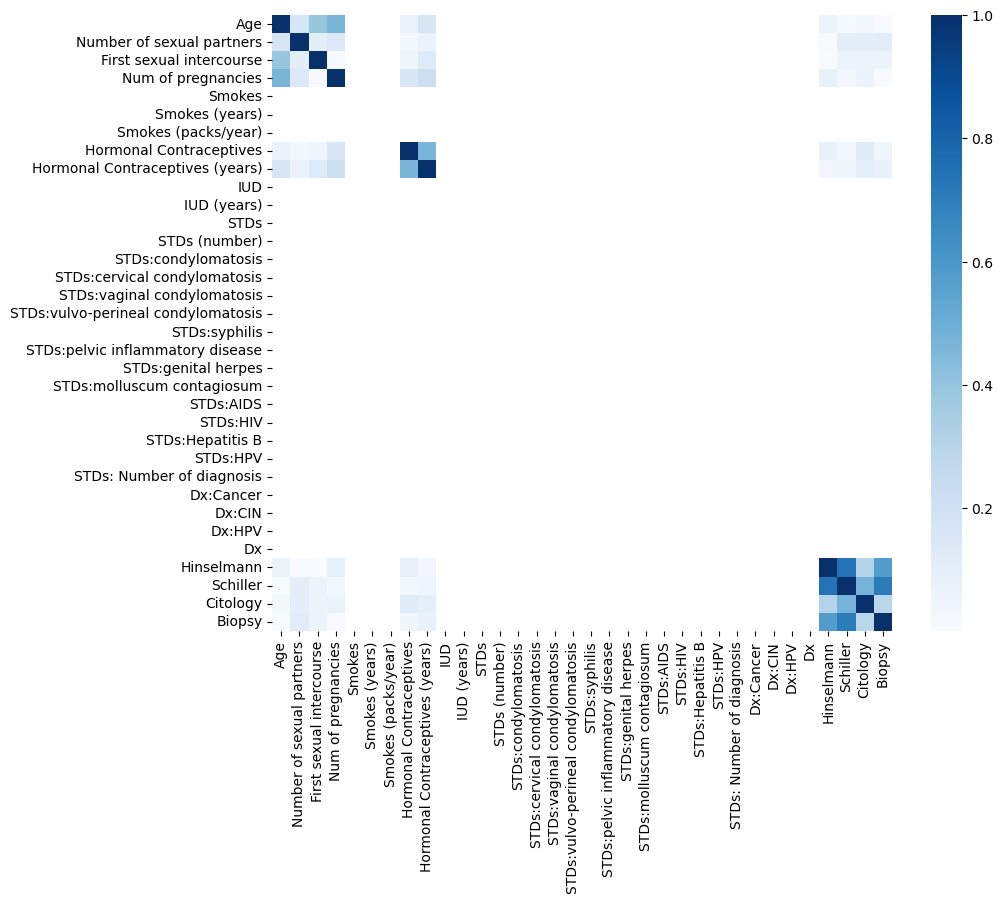

In [18]:
# plot the corelation heat map of train_df
corr_matrix1 = train_df.corr().abs()
print("\nHeat map for training data\nShape of training data :", train_df.shape)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix1, cmap='Blues', annot=False)
plt.show()


In [34]:
plot = train_df.abs().plot.pie(subplots=True, figsize=(11, 6))

/home/hunter/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3201: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 1100x600 with 34 Axes>


Heat map for risk factors data
Shape of risk facotrs data : (351, 30)


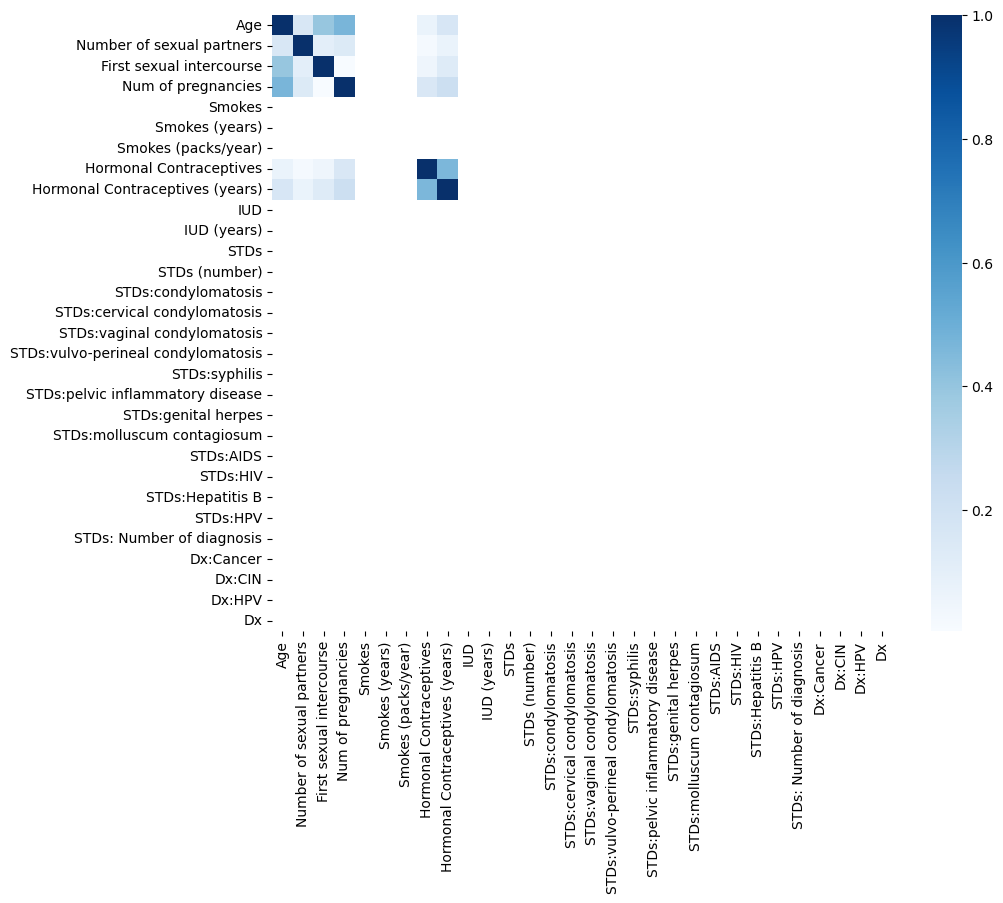

In [ ]:
# plot the coreltaion heatmap of the risk factors
corr_matrix2 = risk_factors.corr().abs()
print("\nHeat map for risk factors data\nShape of risk facotrs data :",
      risk_factors.shape)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, cmap='Blues', annot=False)
plt.show()


In [ ]:
# Apply PCA with n_components=3 on training data
pca = PCA(n_components=3)
risk_factors_pca = pca.fit_transform(risk_factors)

# Convert to a pandas DataFrame
risk_factors = pd.DataFrame(data=risk_factors_pca,
                            columns=['PC1', 'PC2', 'PC3'])



 Heatmap of risk factors after PCA for training data
 shape of the corresponding (351, 3)


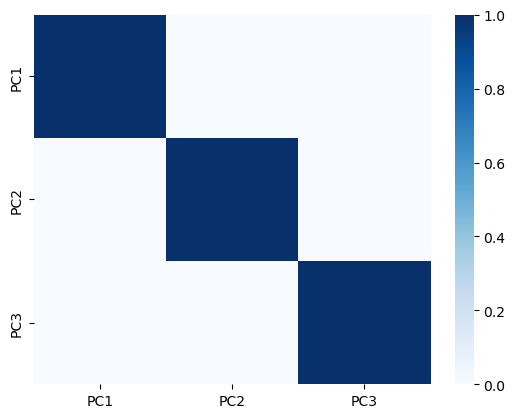

In [ ]:
corr_matrix3 = risk_factors.corr().abs()
print("\n Heatmap of risk factors after PCA for training data\n shape of the corresponding", risk_factors.shape)
# Plot the heatmap after PCA
sns.heatmap(corr_matrix3, cmap='Blues', annot=False)
plt.show()


In [ ]:
# Apply PCA with n_components=3 on testing data
pca = PCA(n_components=3)
risk_factors_test_pca = pca.fit_transform(risk_factors_test)
# Convert to a pandas DataFrame
risk_factors_test = pd.DataFrame(
    data=risk_factors_test_pca, columns=['PC1', 'PC2', 'PC3'])



 Heatmap of risk factors after PCA for testing data 
 shape of the corresponding (144, 3)


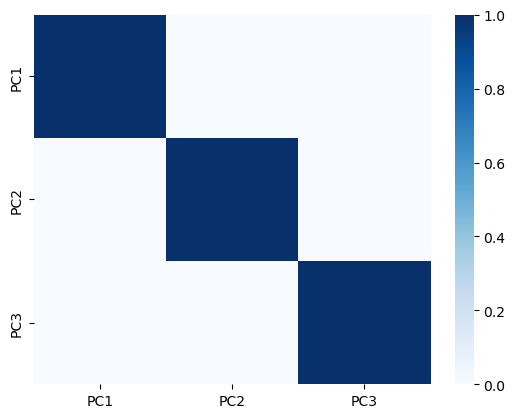

In [ ]:
corr_matrix4 = risk_factors_test.corr().abs()
print("\n Heatmap of risk factors after PCA for testing data \n shape of the corresponding",
      risk_factors_test.shape)
# Plot the heatmap after PCA for testing data
sns.heatmap(corr_matrix4, cmap='Blues', annot=False)
plt.show()


In [ ]:
# balancing the classes in training data using smote
ros = SMOTE(random_state=0)
Xhin_resampled, hin_resampled = ros.fit_resample(risk_factors, hin)
Xsch_resampled, sch_resampled = ros.fit_resample(risk_factors, sch)
Xcit_resampled, cit_resampled = ros.fit_resample(risk_factors, cit)
Xbio_resampled, bio_resampled = ros.fit_resample(risk_factors, bio)

print(Xhin_resampled.shape)


(676, 3)


In [ ]:
# copying test data to variables that are fed into the training models
Xhin_test_resampled, hin_test_resampled = risk_factors_test, hin_test
Xsch_test_resampled, sch_test_resampled = risk_factors_test, sch_test
Xcit_test_resampled, cit_test_resampled = risk_factors_test, cit_test
Xbio_test_resampled, bio_test_resampled = risk_factors_test, bio_test

print(Xhin_test_resampled.shape)


(144, 3)


SVM result data with hinselmann as target varible for training and testing



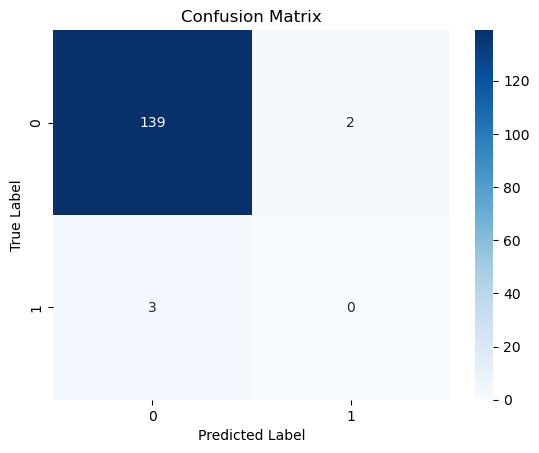

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       141
           1       0.00      0.00      0.00         3

    accuracy                           0.97       144
   macro avg       0.49      0.49      0.49       144
weighted avg       0.96      0.97      0.96       144



In [ ]:
# create a SVM model with kernel='rbf' and parameter c=900
svclassifier_hin = SVC(kernel='rbf', C=10, gamma=100)

# train the model on the data
svclassifier_hin.fit(Xhin_resampled, hin_resampled)

# make predictions on train data
y_pred_hin = svclassifier_hin.predict(Xhin_test_resampled)
print("SVM result data with hinselmann as target varible for training and testing\n")
cm = confusion_matrix(hin_test_resampled, y_pred_hin)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(hin_test_resampled, y_pred_hin))
accuracy_h_svm = accuracy_score(hin_test_resampled, y_pred_hin)
precision_h_svm = precision_score(hin_test_resampled, y_pred_hin)
recall_h_svm = recall_score(hin_test_resampled, y_pred_hin)



SVM result data with Schiller as target varible for training and testing



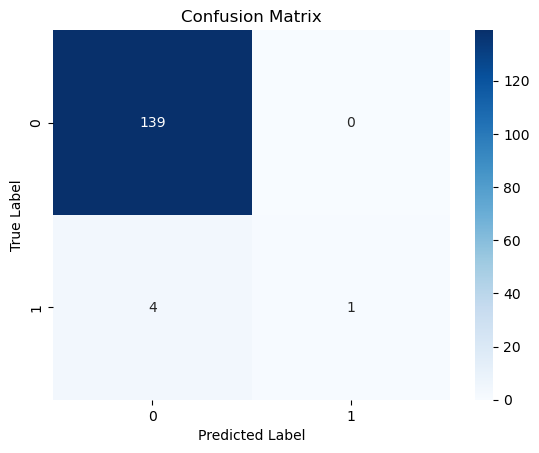

Classfication report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       139
           1       1.00      0.20      0.33         5

    accuracy                           0.97       144
   macro avg       0.99      0.60      0.66       144
weighted avg       0.97      0.97      0.96       144



In [ ]:
# create a SVM model with kernel='rbf' and parameter c=1 and gamma
svclassifier_sch = SVC(kernel='rbf', C=1, gamma=100)

# train the model on the data
svclassifier_sch.fit(Xsch_resampled, sch_resampled)

# make predictions on train data
y_pred_sch = svclassifier_sch.predict(Xsch_test_resampled)
print("\nSVM result data with Schiller as target varible for training and testing\n")
# print("Confusion Maatrix : \n",confusion_matrix(sch_test_resampled,y_pred_sch),"\n")
cm = confusion_matrix(sch_test_resampled, y_pred_sch)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classfication report : \n", classification_report(sch_test_resampled, y_pred_sch))
accuracy_s_svm = accuracy_score(sch_test_resampled, y_pred_sch)
precision_s_svm = precision_score(sch_test_resampled, y_pred_sch)
recall_s_svm = recall_score(sch_test_resampled, y_pred_sch)



SVM result data with citology as target varible for training and testing



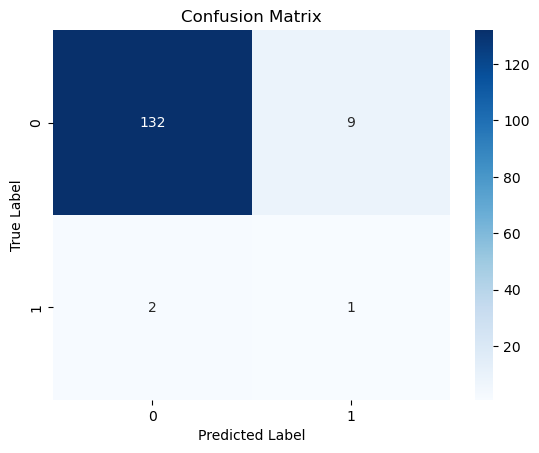

Classfication report : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       141
           1       0.10      0.33      0.15         3

    accuracy                           0.92       144
   macro avg       0.54      0.63      0.56       144
weighted avg       0.97      0.92      0.94       144



In [ ]:
# create a SVM model with kernel='rbf' and parameter c=2000
svclassifier_cit = SVC(kernel='rbf', C=100, gamma=100)

# train the model on the data
svclassifier_cit.fit(Xcit_resampled, cit_resampled)

# make predictions on train data
y_pred_cit = svclassifier_cit.predict(Xcit_test_resampled)

print("\nSVM result data with citology as target varible for training and testing\n")
cm = confusion_matrix(cit_test_resampled, y_pred_cit)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classfication report : \n", classification_report(cit_test_resampled, y_pred_cit))
accuracy_c_svm = accuracy_score(cit_test_resampled, y_pred_cit)
precision_c_svm = precision_score(cit_test_resampled, y_pred_cit)
recall_c_svm = recall_score(cit_test_resampled, y_pred_cit)



SVM result data with citology as target varible for training and testing



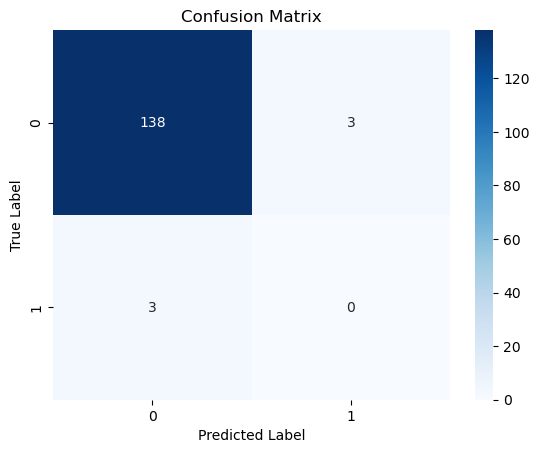

Classfication report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       141
           1       0.00      0.00      0.00         3

    accuracy                           0.96       144
   macro avg       0.49      0.49      0.49       144
weighted avg       0.96      0.96      0.96       144



In [ ]:
# create a SVM model with kernel='rbf' and parameter c=2000
svclassifier_bio = SVC(kernel='rbf', C=10, gamma=100)

# train the model on the data
svclassifier_bio.fit(Xbio_resampled, bio_resampled)

# make predictions on train data
y_pred_bio = svclassifier_bio.predict(Xbio_test_resampled)
print("\nSVM result data with citology as target varible for training and testing\n")
cm = confusion_matrix(bio_test_resampled, y_pred_bio)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classfication report : \n", classification_report(bio_test_resampled, y_pred_bio))
accuracy_b_svm = accuracy_score(bio_test_resampled, y_pred_bio)
precision_b_svm = precision_score(bio_test_resampled,y_pred_bio)
recall_b_svm = recall_score(bio_test_resampled,y_pred_bio)


KNN result data with hinselmann as target varible for training and testing



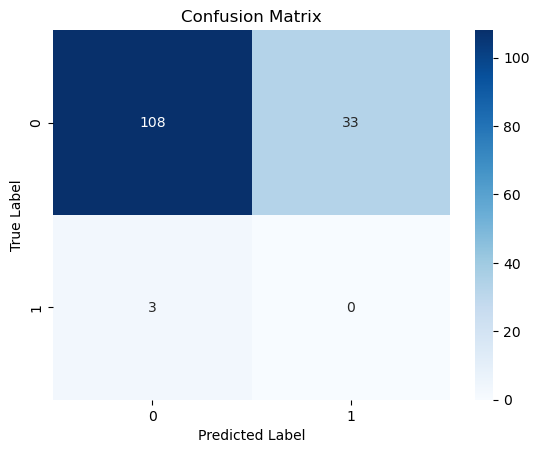

Classfication report : 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86       141
           1       0.00      0.00      0.00         3

    accuracy                           0.75       144
   macro avg       0.49      0.38      0.43       144
weighted avg       0.95      0.75      0.84       144



In [ ]:
# Create a KNN model with k=6
knn_hin = KNeighborsClassifier(n_neighbors=6, weights='distance')

# Train the KNN model on the training data
knn_hin.fit(Xhin_resampled, hin_resampled)

# Make predictions on the test data
y_pred_hin = knn_hin.predict(Xhin_test_resampled)

print("KNN result data with hinselmann as target varible for training and testing\n")
cm = confusion_matrix(hin_test_resampled, y_pred_hin)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classfication report : \n", classification_report(hin_test_resampled, y_pred_hin))
accuracy_h_knn = accuracy_score(hin_test_resampled, y_pred_hin)
precision_h_knn = precision_score(hin_test_resampled, y_pred_hin)
recall_h_knn = recall_score(hin_test_resampled, y_pred_hin)


KNN result data with schiller as target varible for training and testing



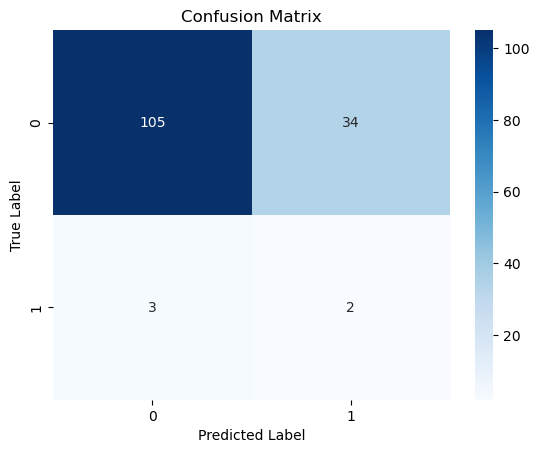

Classfication report : 
               precision    recall  f1-score   support

           0       0.97      0.76      0.85       139
           1       0.06      0.40      0.10         5

    accuracy                           0.74       144
   macro avg       0.51      0.58      0.47       144
weighted avg       0.94      0.74      0.82       144



In [ ]:
# Create a KNN model with k=6
knn_sch = KNeighborsClassifier(n_neighbors=6)

# Train the KNN model on the training data
knn_sch.fit(Xsch_resampled, sch_resampled)

# Make predictions on the test data
y_pred_sch = knn_sch.predict(Xsch_test_resampled)

print("KNN result data with schiller as target varible for training and testing\n")
cm = confusion_matrix(sch_test_resampled, y_pred_sch)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classfication report : \n", classification_report(sch_test_resampled, y_pred_sch))
accuracy_s_knn = accuracy_score(sch_test_resampled, y_pred_sch)
precision_s_knn = precision_score(sch_test_resampled, y_pred_sch)
recall_s_knn = recall_score(sch_test_resampled, y_pred_sch)


KNN result data with citology as target varible for training and testing



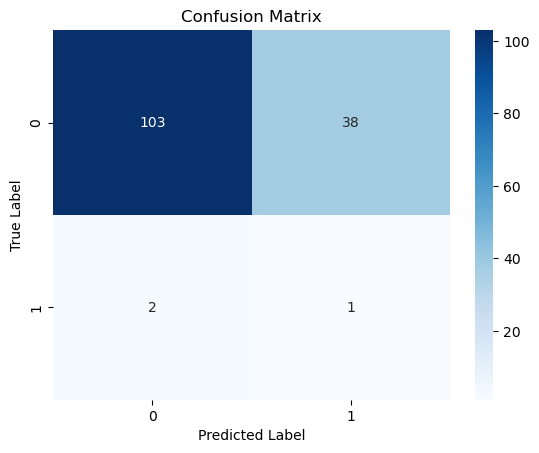

Classfication report : 
               precision    recall  f1-score   support

           0       0.98      0.73      0.84       141
           1       0.03      0.33      0.05         3

    accuracy                           0.72       144
   macro avg       0.50      0.53      0.44       144
weighted avg       0.96      0.72      0.82       144



In [ ]:
# Create a KNN model with k=8
knn_cit = KNeighborsClassifier(n_neighbors=8)

# Train the KNN model on the training data
knn_cit.fit(Xcit_resampled, cit_resampled)

# Make predictions on the test data
y_pred_cit = knn_cit.predict(Xcit_test_resampled)

print("KNN result data with citology as target varible for training and testing\n")
cm = confusion_matrix(cit_test_resampled, y_pred_cit)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classfication report : \n", classification_report(cit_test_resampled, y_pred_cit))
accuracy_c_knn = accuracy_score(cit_test_resampled, y_pred_cit)
precision_c_knn = precision_score(cit_test_resampled, y_pred_cit)
recall_c_knn = recall_score(cit_test_resampled, y_pred_cit)


KNN result data with biopsy as target varible for training and testing



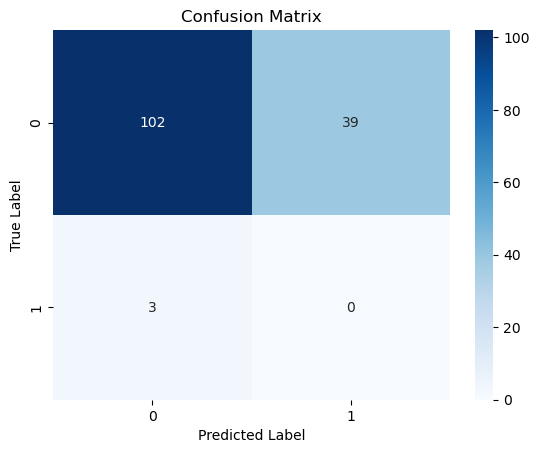

Classfication report : 
               precision    recall  f1-score   support

           0       0.97      0.72      0.83       141
           1       0.00      0.00      0.00         3

    accuracy                           0.71       144
   macro avg       0.49      0.36      0.41       144
weighted avg       0.95      0.71      0.81       144



In [ ]:
# Create a KNN model with k=6
knn_bio = KNeighborsClassifier(n_neighbors=6)

# Train the KNN model on the training data
knn_bio.fit(Xbio_resampled, bio_resampled)

# Make predictions on the test data
y_pred_bio = knn_bio.predict(Xbio_test_resampled)

print("KNN result data with biopsy as target varible for training and testing\n")
cm = confusion_matrix(bio_test_resampled, y_pred_bio)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classfication report : \n", classification_report(bio_test_resampled, y_pred_bio))
accuracy_b_knn = accuracy_score(bio_test_resampled, y_pred_bio)
precision_b_knn = precision_score(bio_test_resampled,y_pred_bio)
recall_b_knn = recall_score(bio_test_resampled,y_pred_bio)

In [ ]:

print ("for svm :")
data = {
    'Accuracy': [accuracy_h_svm, accuracy_s_svm, accuracy_c_svm, accuracy_b_svm],
    'Precision': [precision_h_svm, precision_s_svm, precision_c_svm, precision_b_svm],        # Create a table containing the evaluation metrics
    'Recall': [recall_h_svm, recall_s_svm, recall_c_svm, recall_b_svm]
}
df_table = pd.DataFrame(data, index=['Hinselmann', 'Schiller', 'Citology', 'Biopsy'])
print(df_table)

print ("\nfor knn :")
data = {
    'Accuracy': [accuracy_h_knn, accuracy_s_knn, accuracy_c_knn, accuracy_b_knn],
    'Precision': [precision_h_knn, precision_s_knn, precision_c_knn, precision_b_knn],        # Create a table containing the evaluation metrics
    'Recall': [recall_h_knn, recall_s_knn, recall_c_knn, recall_b_knn]
}
df_table = pd.DataFrame(data, index=['Hinselmann', 'Schiller', 'Citology', 'Biopsy'])
print(df_table)

for svm :
            Accuracy  Precision    Recall
Hinselmann  0.965278        0.0  0.000000
Schiller    0.972222        1.0  0.200000
Citology    0.923611        0.1  0.333333
Biopsy      0.958333        0.0  0.000000

for knn :
            Accuracy  Precision    Recall
Hinselmann  0.750000   0.000000  0.000000
Schiller    0.743056   0.055556  0.400000
Citology    0.722222   0.025641  0.333333
Biopsy      0.708333   0.000000  0.000000
